# Code for exercise 8.67
Import libraries

In [58]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import poisson, nbinom

Let's read the data. I stored the data using git LFS. You will have to set up
git LFS before (https://git-lfs.com)

In [59]:
data = pd.read_csv('data/hw-11-data.csv')

Create series from counts

In [60]:
glaux_observed = np.repeat(data["counts"].iloc[0:15], data["glaux"].iloc[0:15])
beetles_observed = np.repeat(data["counts"], data["beetles"])

Fit poisson distribution using method of moments (E(X) = lambda)

In [61]:
lambda_glaux = np.mean(glaux_observed)
lambda_beetles = np.mean(beetles_observed)

Fit negative binomial distribution using method of moments. See: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html. n is the number of successes, p is the probability of success

In [62]:
p_glaux = np.mean(glaux_observed) / np.var(glaux_observed)
n_glaux = np.mean(glaux_observed) ** 2 / (
    np.var(glaux_observed) - np.mean(glaux_observed)
)
p_beetles = np.mean(beetles_observed) / np.var(beetles_observed)
n_beetles = np.mean(beetles_observed) ** 2 / (
    np.var(beetles_observed) - np.mean(beetles_observed)
)

Glaux maritima goodness of fit

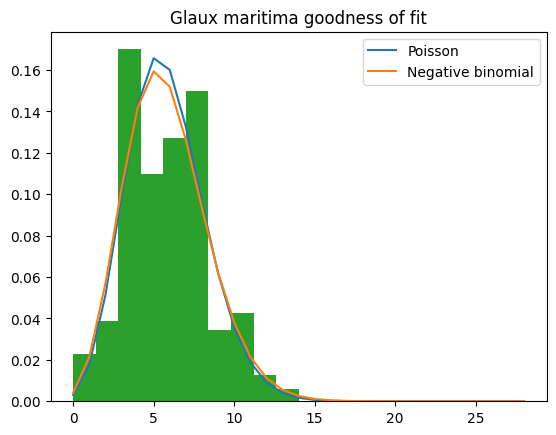

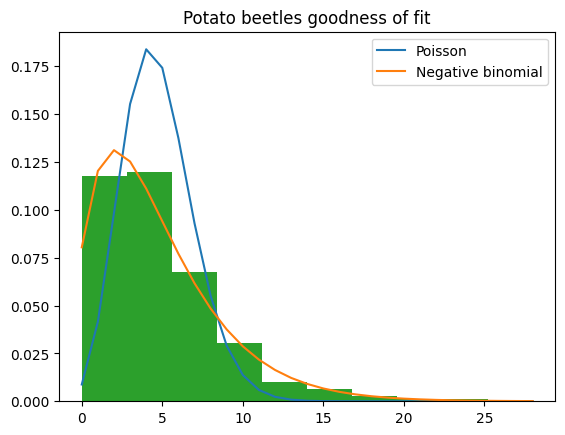

In [63]:
x = list(range(0, data.counts.max() + 1))
plt.plot(x, poisson.pmf(x, lambda_glaux), label="Poisson")
plt.plot(x, nbinom.pmf(x, n_glaux, p_glaux), label="Negative binomial")
plt.hist(glaux_observed, density=True)
plt.legend()
plt.title("Glaux maritima goodness of fit")
plt.show()

# Potato beetles goodness of fit
plt.plot(x, poisson.pmf(x, lambda_beetles), label="Poisson")
plt.plot(x, nbinom.pmf(x, n_beetles, p_beetles), label="Negative binomial")
plt.hist(beetles_observed, density=True)
plt.title("Potato beetles goodness of fit")
plt.legend()
plt.show()

# Code for Wolf exercise 1

In [64]:
data = np.array(
    [
        [-2.2, -0.2, 0.2, 1.2, -0.2, 0.4, 0.1],
        [-0.5, 0.7, -0.4, 0.3, 0.7, 1.2, -0.3],
        [0.4, -0.9, 0.1, 0.8, -1.1, -0.6, 0.5],
        [0.7, 1.8, -0.2, 0.7, -1.2, 1.9, -1.1],
    ]
)

Calculate the grand mean and shrinkage mean estimator for various alphas

In [65]:
grand_mean = np.mean(np.mean(data, axis=1))
alphas = [0, 0.25, 0.5, 0.75, 1]
mean_shrinkage = [
    alpha * grand_mean + (1 - alpha) * np.mean(data, axis=1) for alpha in alphas
]

# Code for Wolf exercise 2

Find the optimal alpha according to Stein, Page 38, Slides 08

In [66]:
sigma_hat = (1 / (data.shape[0] - 1)) * np.sum((data.T - np.mean(data, axis=1)) ** 2)
alpha_star = (
    (data.shape[0] - 3) * sigma_hat / np.sum((data.T - np.mean(data, axis=1)) ** 2)
)

Calculate the shrinkage mean estimator for the optimal alpha

In [67]:
mean_shrinkage_optimal = alpha_star * grand_mean + (1 - alpha_star) * np.mean(
    data, axis=1
)
np.set_printoptions(precision=2)
print("Shrinkage estimator: " + str(mean_shrinkage_optimal))
print("Sample estimator: ", str(np.mean(data, axis=1)))

Shrinkage estimator: [-0.03  0.2  -0.04  0.28]
Sample estimator:  [-0.1   0.24 -0.11  0.37]
